<a href="https://colab.research.google.com/github/Rahul031097/python-random-quote/blob/master/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip /content/disease_prediction.zip

Archive:  /content/disease_prediction.zip
replace Symptom-severity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace symptom_Description.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace symptom_precaution.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import missingno as msno
import seaborn as sns
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(4920, 18)

In [6]:
# checking missing values in data
df.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [7]:
df.fillna(0)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,0,0,0,0,0,0,0,0,0,0,0
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,0,0,0,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,0,0,0,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [10]:
df_col=list(df.columns)
df_col

['Disease',
 'Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

In [11]:
for i in range(len(df_col)):
  df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]])

df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,33,35,35,11,38,32,26,21,22,21,18,11,8,4,3,3,1
1,15,24,27,18,50,38,32,26,21,22,21,18,11,8,4,3,3,1
2,15,33,27,18,50,38,32,26,21,22,21,18,11,8,4,3,3,1
3,15,33,35,18,50,38,32,26,21,22,21,18,11,8,4,3,3,1
4,15,33,35,35,50,38,32,26,21,22,21,18,11,8,4,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,28,17,33,38,22,29,26,21,22,21,18,11,8,4,3,3,1
4916,2,24,31,3,35,38,32,26,21,22,21,18,11,8,4,3,3,1
4917,38,4,4,22,7,38,32,26,21,22,21,18,11,8,4,3,3,1
4918,35,24,20,42,36,27,15,26,21,22,21,18,11,8,4,3,3,1


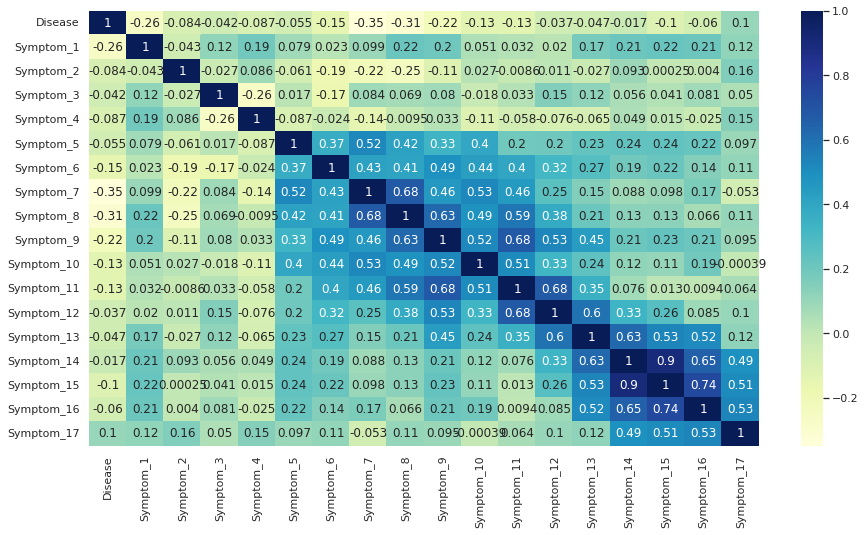

In [12]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [13]:
# Independent variables
X = df.iloc[:, :-1].values
print(X)

# dependent variable y
y = df.iloc[:,-1].values
y

[[15 33 35 ...  4  3  3]
 [15 24 27 ...  4  3  3]
 [15 33 27 ...  4  3  3]
 ...
 [38  4  4 ...  4  3  3]
 [35 24 20 ...  4  3  3]
 [27 24 18 ...  4  3  3]]


array([1, 1, 1, ..., 1, 1, 1])

In [14]:
'''X=df.drop(["Symptom_15","Symptom_16"], axis=1)
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)'''

'X=df.drop(["Symptom_15","Symptom_16"], axis=1)\nvif = pd.DataFrame()\nvif["features"] = X.columns\nvif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]\nprint(vif)'

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Creating training & validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.25)

In [17]:
X_train = df.drop("Disease",axis=1)
y_train = df["Disease"].copy()
X_test = df.drop("Disease",axis=1)
y_test = df["Disease"].copy()

In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier()

In [19]:
dt_model = DecisionTreeClassifier(random_state =10)

In [20]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [21]:
cols = df.columns

In [22]:
data = pd.read_csv('/content/Symptom-severity.csv')
data.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [23]:
data['Symptom'].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [24]:
val = df.values
symptoms = data['Symptom'].unique()
for i in range(len(symptoms)):
  val[val == symptoms[i]] = data[data['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(val, columns=cols)
d.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,15,33,35,35,11,38,32,26,21,22,21,18,11,8,4,3,3,1
1,15,24,27,18,50,38,32,26,21,22,21,18,11,8,4,3,3,1
2,15,33,27,18,50,38,32,26,21,22,21,18,11,8,4,3,3,1
3,15,33,35,18,50,38,32,26,21,22,21,18,11,8,4,3,3,1
4,15,33,35,35,50,38,32,26,21,22,21,18,11,8,4,3,3,1


In [25]:
new_data = df.iloc[:,1:].values
labels = df['Disease'].values

In [26]:
pred = dt_model.predict(X_test)

[Text(0.14384880967027558, 0.9722222222222222, 'X[13] <= 2.5\ngini = 0.976\nsamples = 4920\nvalue = [120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120, 120, 120, 120, 120, 120, 120, 120, 120, 120\n120]'),
 Text(0.047244094488188976, 0.9166666666666666, 'X[8] <= 11.5\ngini = 0.5\nsamples = 240\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0]'),
 Text(0.031496062992125984, 0.8611111111111112, 'gini = 0.0\nsamples = 120\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0, 0]'),
 Text(0.06299212598425197, 0.8611111111111112, 'gini = 0.0\nsamples = 120\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 120, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.2404535248523622, 0.916666666

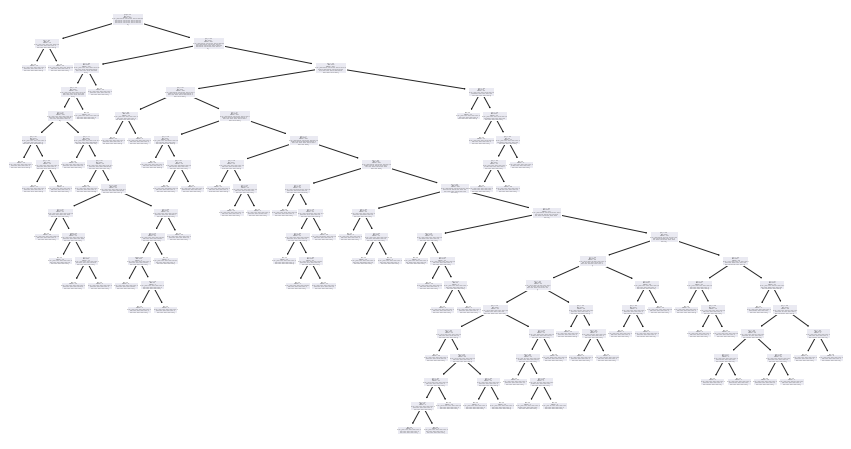

In [27]:
tree.plot_tree(dt_model)

In [30]:
print("Classification report - \n", classification_report(y_test, pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00       120
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       120
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       120
           7       1.00      1.00      1.00       120
           8       1.00      1.00      1.00       120
           9       1.00      1.00      1.00       120
          10       1.00      1.00      1.00       120
          11       1.00      1.00      1.00       120
          12       1.00      1.00      1.00       120
          13       1.00      1.00      1.00       120
          14       1.00      1.00      1.00       120
          15       1.00      1.00      1.00       120
          16       1.00      1.00      1.00       120
 

Text(0.5, 1.0, 'Accuracy Score: 1.0')

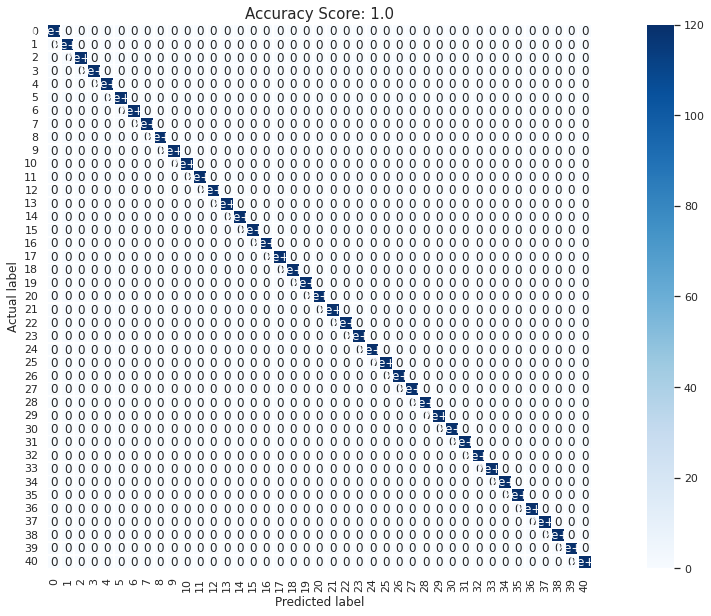

In [33]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(20,10));sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues');plt.ylabel('Actual label')
plt.xlabel('Predicted label');all_sample_title = 'Accuracy Score: {0}'.format(dt_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)